In [ ]:
import cv2
import numpy as np

# **1. Basics**

Loading an image in the working directory.
`img = cv2.imread('image.jpg' [, flags]) `
Flags specify
the color type of a loaded image.
Example: To return a grayscale image:

In [ ]:
img = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg', 0)

Save Image

In [ ]:
img = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
cv2.imwrite('/content/sample_data/UpdatedImage1.jpg',img)

True

View Image


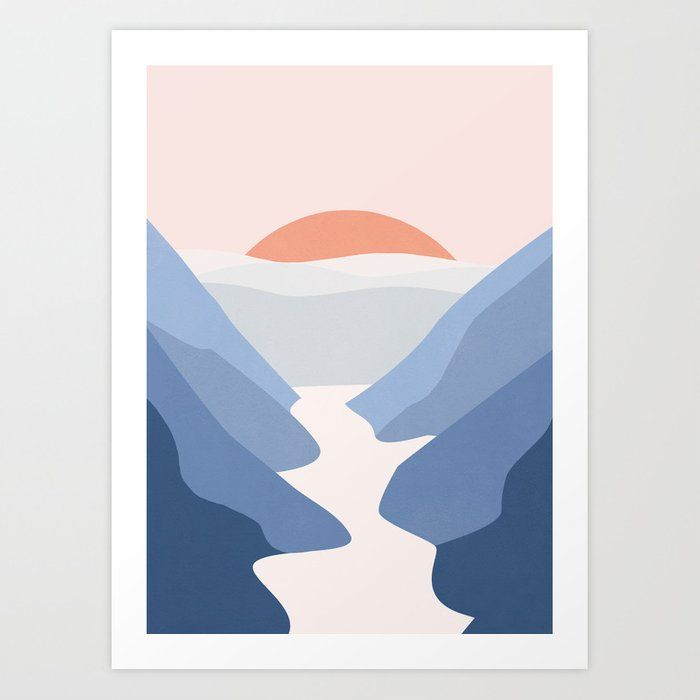

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
#cv2.imshow('image',img) ----> This usual comand does not work in Google Colab
cv2_imshow(img)
# cv2.waitKey(0)            # Wait indefinitely for a keystroke
# cv2.destroyAllWindows()   # Destroy all created windows upon a keystroke

View Image Details


In [ ]:
img = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
print(img.shape) # Number of rows and columns and number of channels (if image is color)
print(img.size) # Number of pixels


(700, 700, 3)
1470000


# **2. Image type conversions**

In [ ]:
print(img.dtype)


uint8


Convert to grayscale

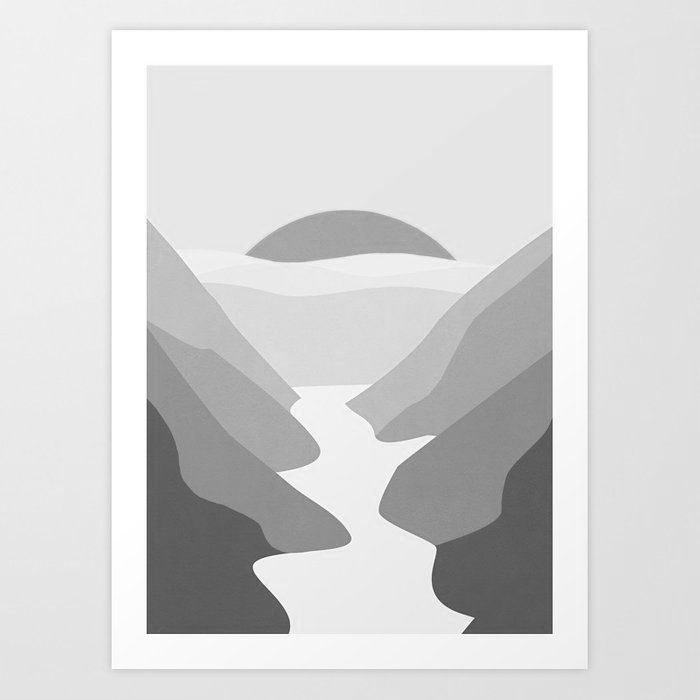

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2.imwrite('/content/sample_data/UpdatedImage1.jpg',img)
cv2_imshow(img)

# 3. Basic Image **Processing** Commands

Resizing

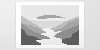

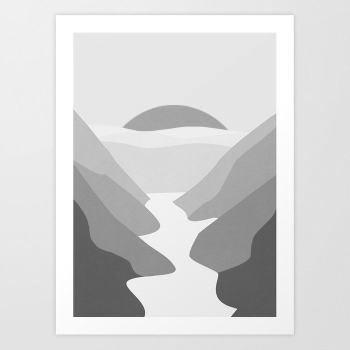

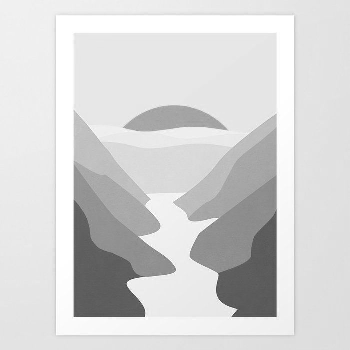

In [ ]:
resized_image1 = cv2.resize(img, (100, 50)) #Reduce image to 100 cols and 50 rows
resized_image2 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) #Reduce both axes by half
resized_image3 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST) #Specifyinterpolation method
cv2_imshow(resized_image1)
cv2_imshow(resized_image2)
cv2_imshow(resized_image3)

Rotation


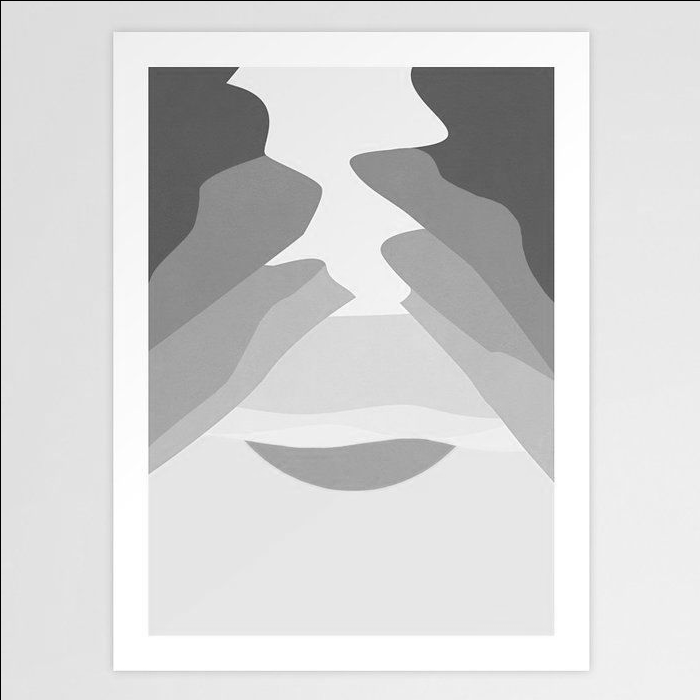

In [ ]:
# Get dimensions of the image and calculate the center of the image
(h, w) = img.shape[:2]
center = (w / 2, h / 2)
# Computing the matrix (M) that can be used for rotating the image
# center - Point around which, the image is rotated
# 180 - Angle by which image is rotated
# 1.0 - Scaling factor (No scaling in this case)
M = cv2.getRotationMatrix2D(center, 180, 1.0)
# Perform the actual rotation
rotated = cv2.warpAffine(img, M, (w, h))
cv2_imshow(rotated)

Cropping


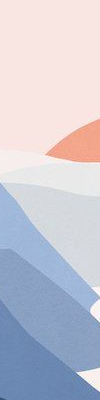

In [ ]:
# startY,startX - starting coordinates where cropping should begin.
# endY,endX - ending coordinates
img = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
cropped = img[100:500, 200:300]
cv2_imshow(cropped)

Comlementing

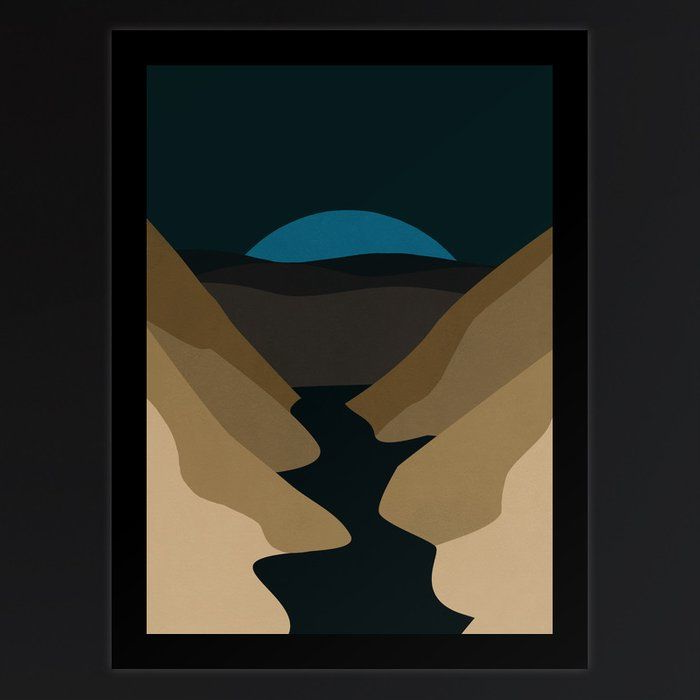

In [ ]:
inverted = cv2.bitwise_not(img)
cv2_imshow(inverted)

Fliping an image

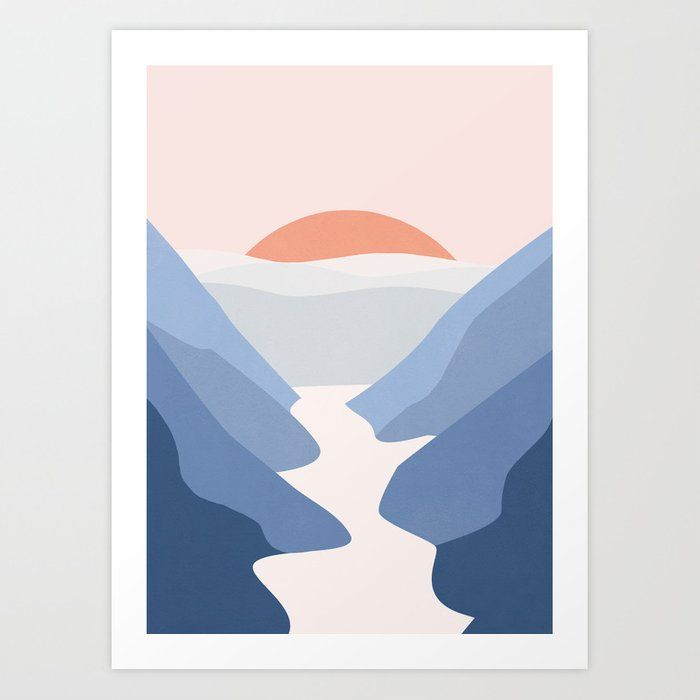

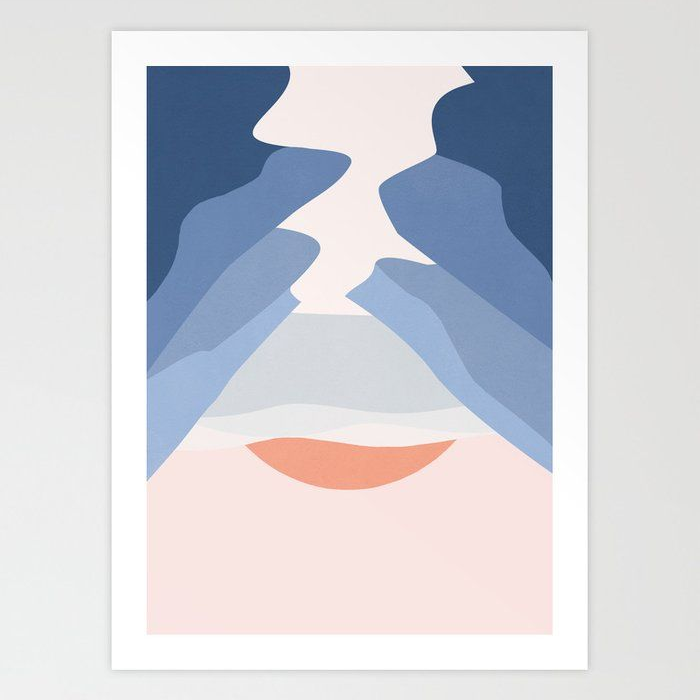

In [ ]:
# flipMode - If 0, flipping around x-axis
# If positive, flipping around y-axis
# If negative, flipping around both axes
cv2_imshow(img)
flipped = cv2.flip(img, 0)
cv2_imshow(flipped)

# **Section 2: CSV to Imageconversion**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Read CSV file

In [ ]:
img_data = pd.read_csv('/content/sample_data/Digits_Lab_01.csv')
img_data.head() # Visualise data as a tabale

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

Reshape the rows of data to images (image size –
28x28x1)


In [ ]:
Reshaped_images = img_data.to_numpy().reshape(-1,28,28,1)

Visualize

19


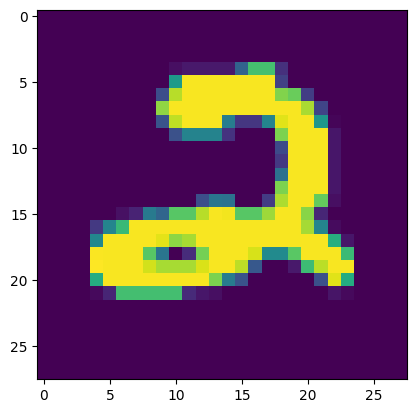

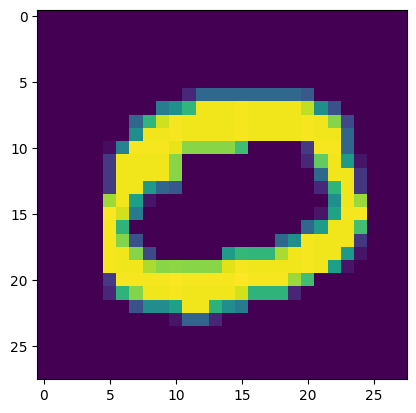

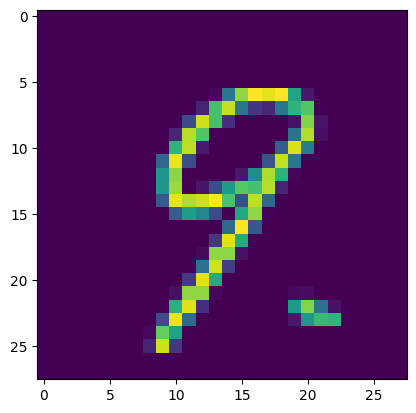

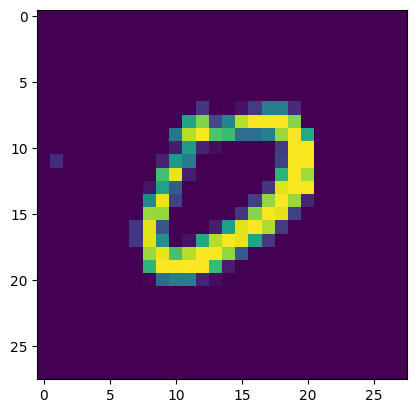

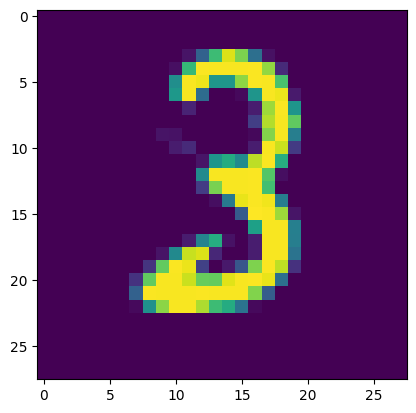

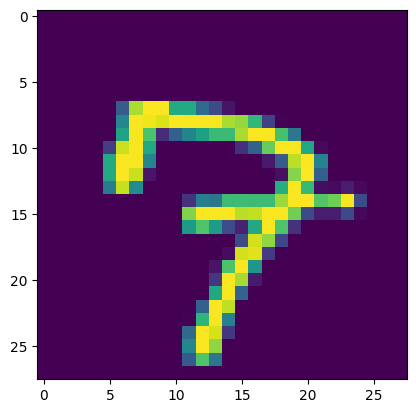

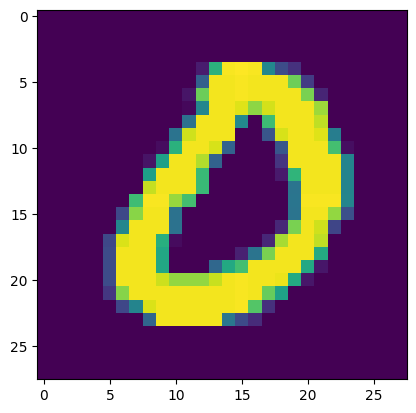

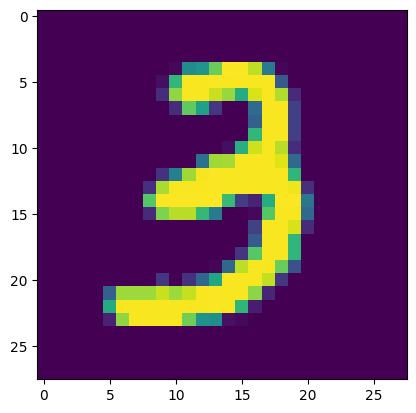

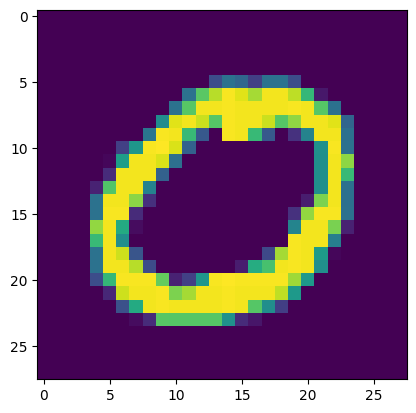

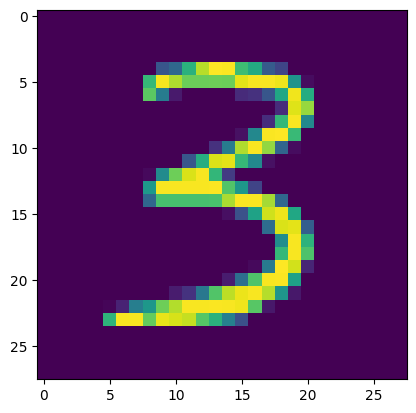

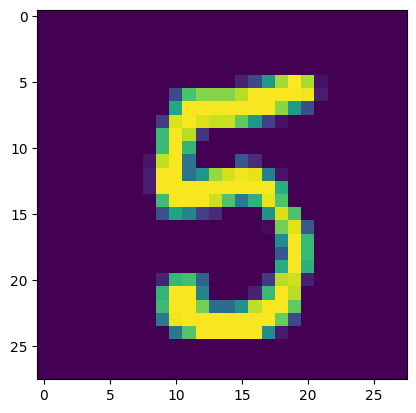

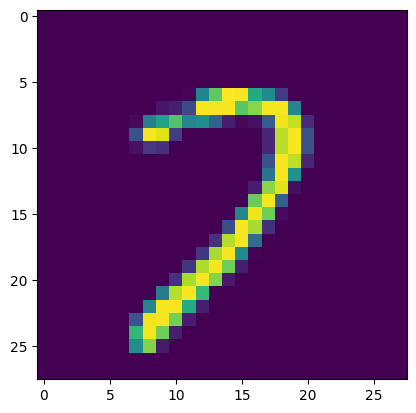

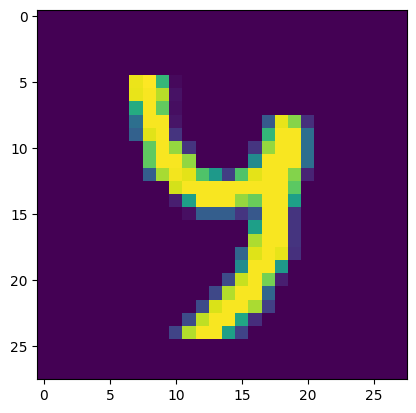

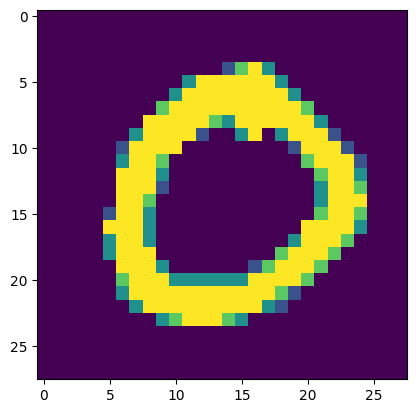

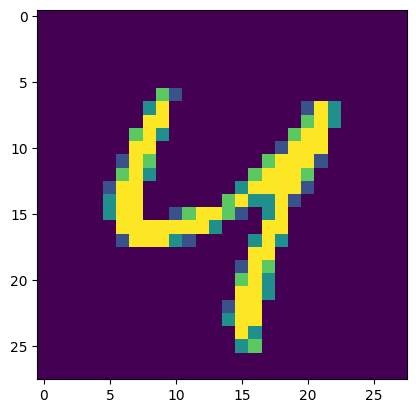

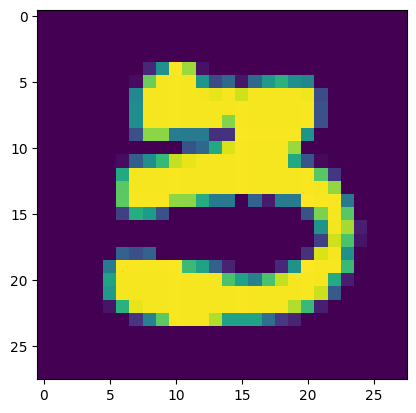

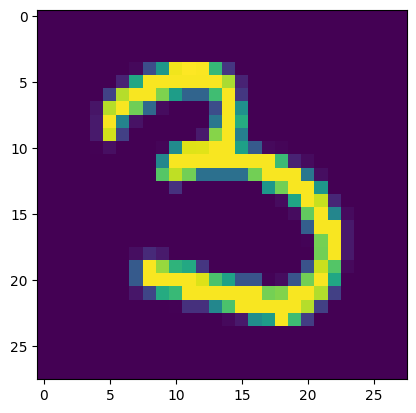

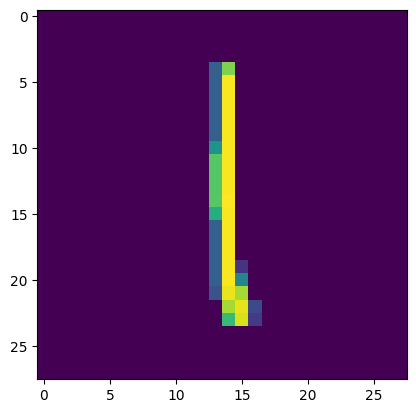

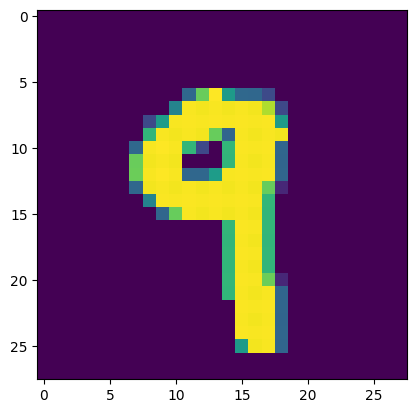

In [ ]:
print(len(Reshaped_images))
for image in (Reshaped_images):
  sample_img = np.array(image).reshape((28,28))
  plt.imshow(sample_img)
  plt.show()

# **Section 3: Geometric Transformations**

Read the image and check for the shape

In [ ]:
img =cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
rows,cols,ch = img.shape

Define the Transformation

In [ ]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)

Do the Transformation

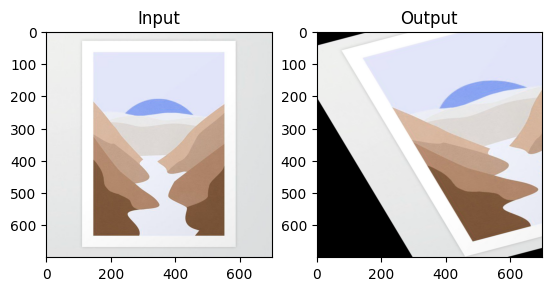

In [ ]:
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

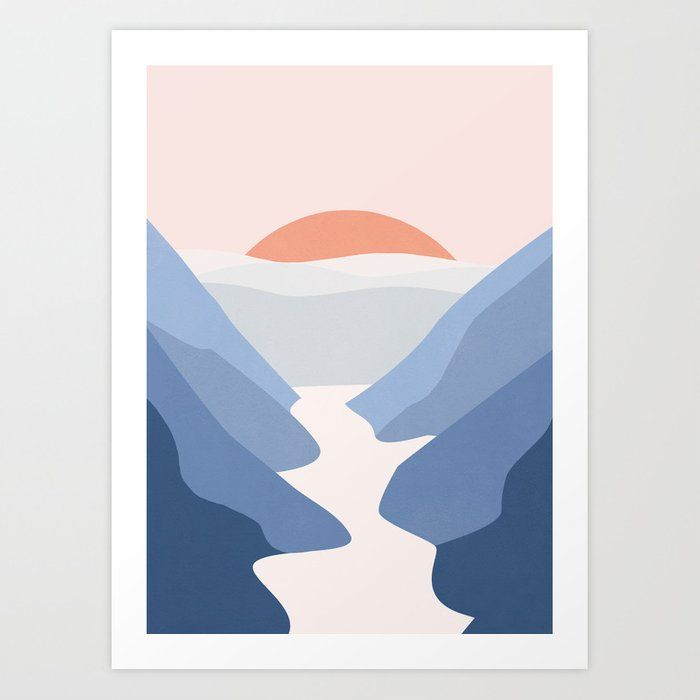

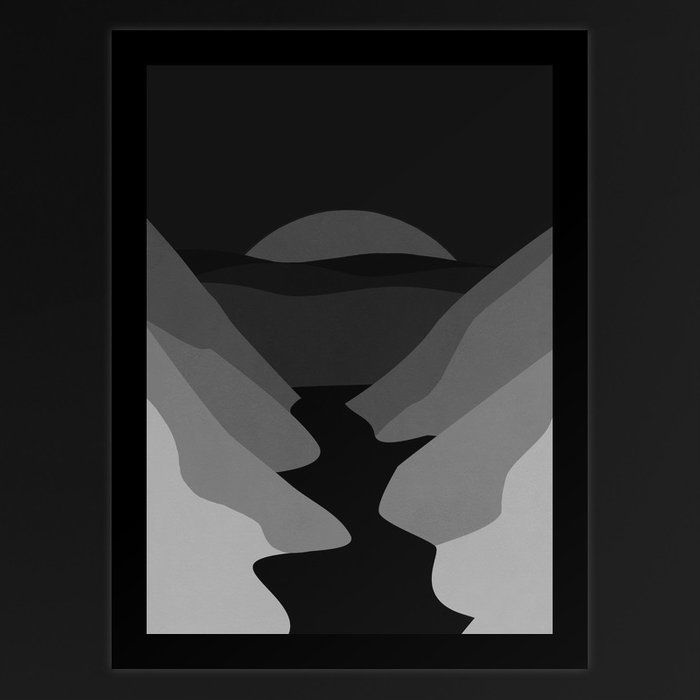

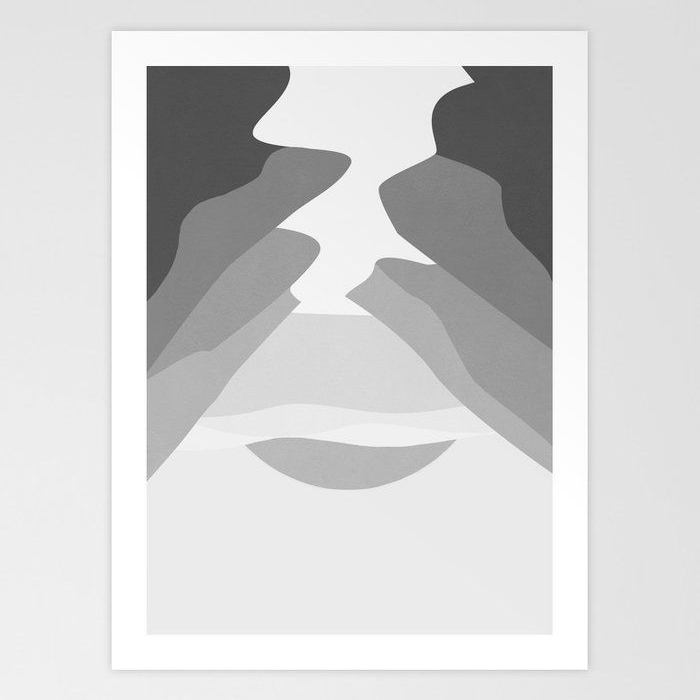

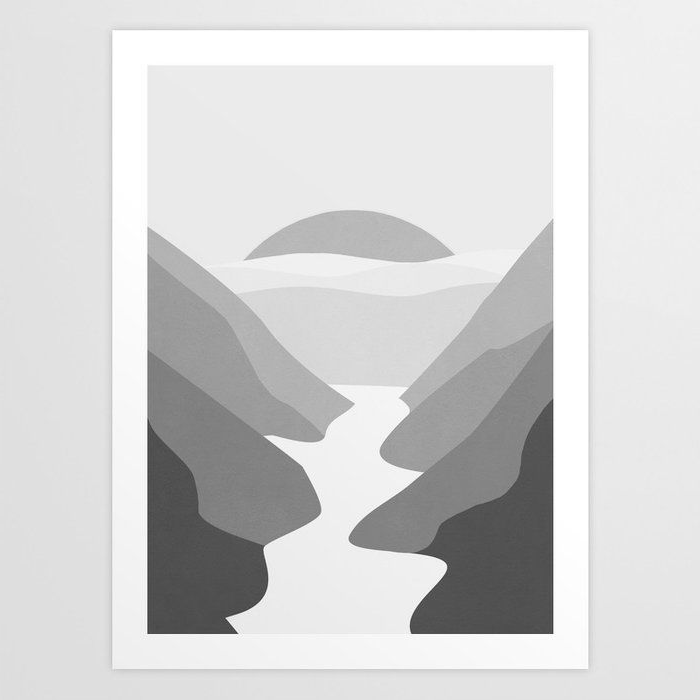

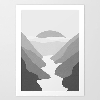

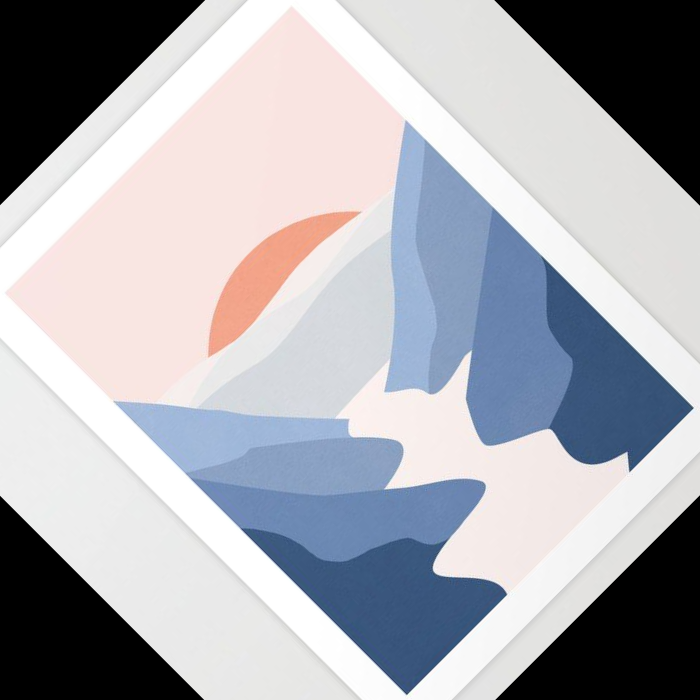

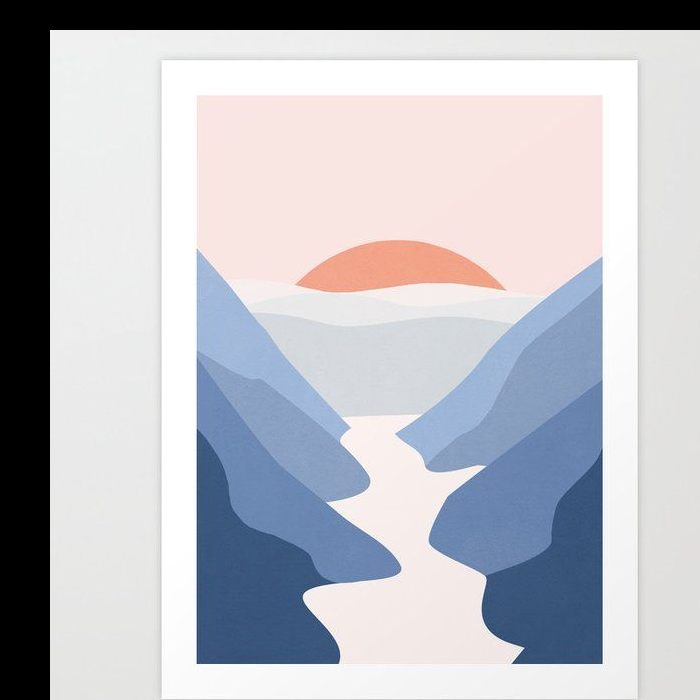

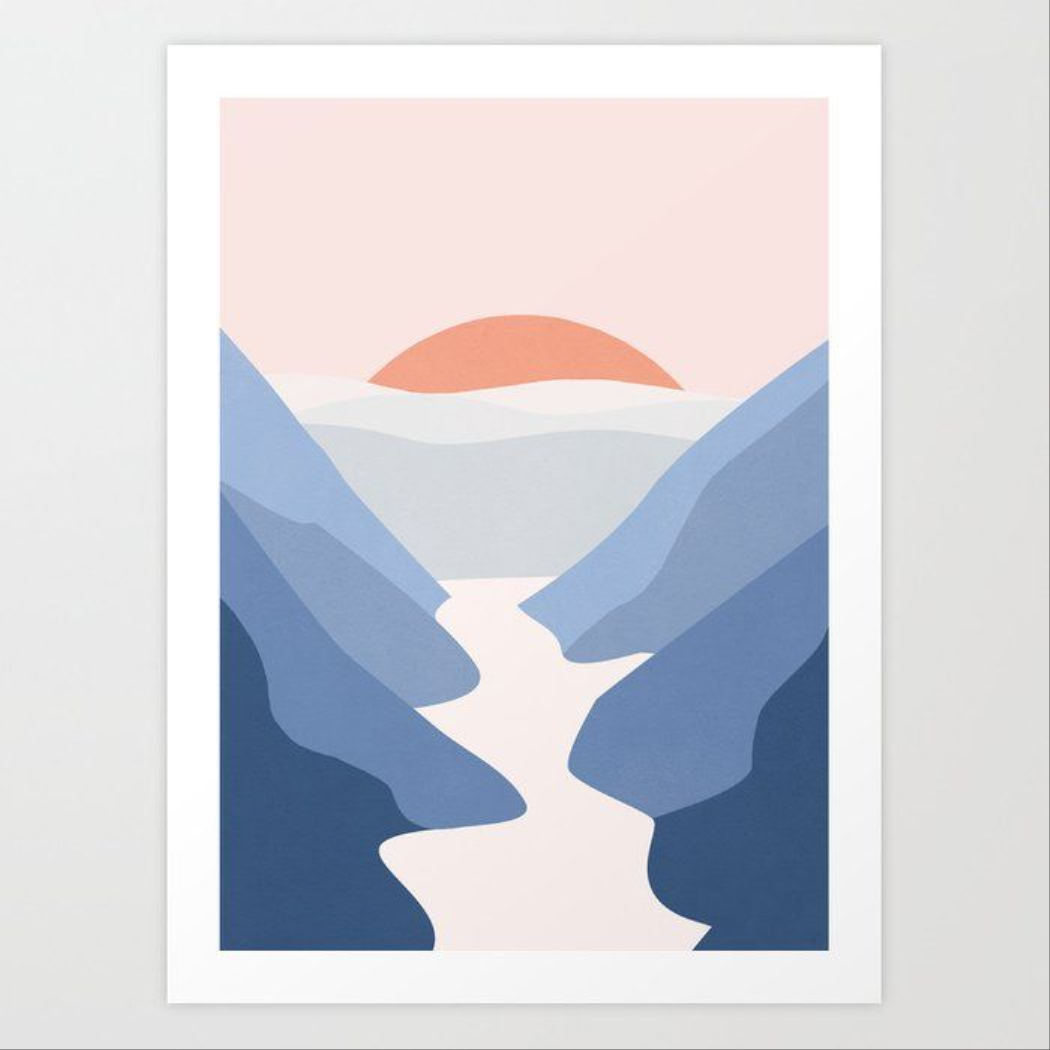

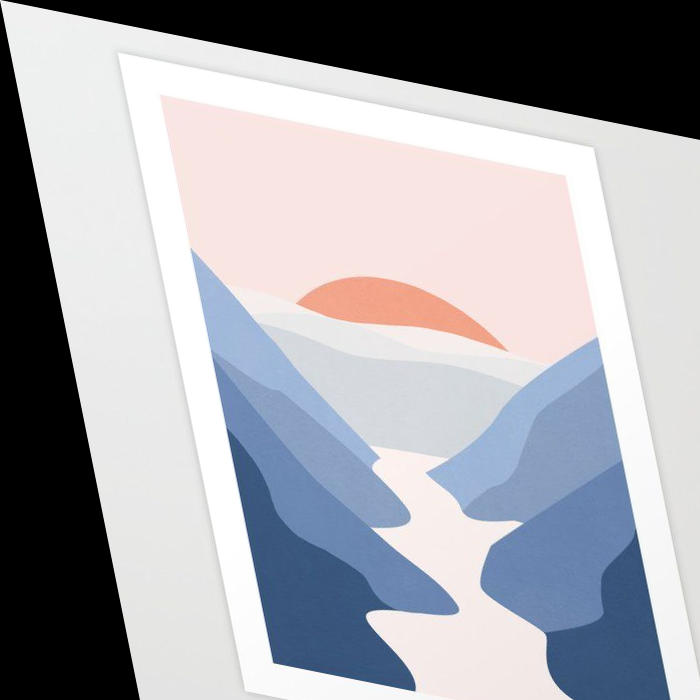

In [60]:
import cv2
import numpy as np

# 1(a) Invert an image
def imcomplement(I):
    return 255 - I

# 1(b) flip image along x-axis (0)
def flipud(I):
    return cv2.flip(I, 0)

# 1(c) flip image along y-axis (1)
def fliplr(I):
    return cv2.flip(I, 1)

# 1(d) Resize image with nearest-neighbour interpolation
def imresize(I, size):
    return cv2.resize(I, tuple(size), interpolation=cv2.INTER_NEAREST)

# Example for geometric transformations
def rotate_image(I, angle):
    rows, cols = I.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(I, M, (cols, rows))

def translate_image(I, tx, ty):
    rows, cols = I.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(I, M, (cols, rows))

def scale_image(I, sx, sy):
    rows, cols = I.shape[:2]
    M = np.float32([[sx, 0, 0], [0, sy, 0]])
    return cv2.warpAffine(I, M, (int(cols * sx), int(rows * sy)))

def shear_image(I, shx, shy):
    rows, cols = I.shape[:2]
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(I, M, (cols, rows))


# Load image
image = cv2.imread('/content/sample_data/eb9931c3f39215a193826992d013a17a.jpg')
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply transformations
inverted = imcomplement(grayscale_image)
flipped_ud = flipud(grayscale_image)
flipped_lr = fliplr(grayscale_image)
resized = imresize(grayscale_image, [100, 100])

# geometric transformations
rotated = rotate_image(image, 45)
translated = translate_image(image, 50, 30)
scaled = scale_image(image, 1.5, 1.5)
sheared = shear_image(image, 0.2, 0.2)

# Display results
cv2_imshow(image)
cv2_imshow(inverted)
cv2_imshow(flipped_ud)
cv2_imshow(flipped_lr)
cv2_imshow(resized)
cv2_imshow(rotated)
cv2_imshow(translated)
cv2_imshow(scaled)
cv2_imshow(sheared)


In [58]:
!jupyter nbconvert --to html /content/Image_Processing_Lab_01.ipynb

[NbConvertApp] Converting notebook /content/Image_Processing_Lab_01.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 39 image(s).
[NbConvertApp] Writing 4708367 bytes to /content/Image_Processing_Lab_01.html
